# Introduction to Programming and Numerical Analysis: Model Project 

In [1]:
# We import all the necessary packets at the beginning of our code:

import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
sm.init_printing(use_unicode=True)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import ipywidgets as widgets

## **Basic OLG**

### **Introduction & household optimization**

The Overlapping Generations Model (OLG) is a class of models in order to study the development of an economy, mostly economic growth. OLG models are characterized by discrete time periods such that in every period at least two different generations live. In the case we study here, there are two generations per period; a young generation that works and an old generation that is retired (meaning that the individuals themselves also only live for two periods, however they overlap with each others life cycles). They all consume in both periods but they only save in their life-time period 1 as they die at the end of period 2 and use all their resources before doing so. Hence, they have a labor income in their 1st period and a capital income in their 2nd period.

- **Beginning of period t:** generation t born
- **Period t:** generation t works
- **End of period t:** genertaion t consumes and saves
- **Period t+1:** generation t lends
- **End of period t+1:** generation t consumes and dies

We will first solve the general case of the model and then complement the model by including the government, which raises taxes or issues debt-bonds. By that, we show that the model is applicable in a much broader setting and therefore also of use to answer more sophisticated questions.

First of all, we have the following CRRA life-time utility function:

\begin{eqnarray*}
U_t=\frac{C_{1t}^{1-\theta}}{1-\theta} + \frac{1}{(1+\rho)}\frac{C_{2t+1}^{1-\theta}}{1-\theta}
\end{eqnarray*}

However, due to simpliticity, but also as theta is not significantly different from 1 in many studies, we take

\begin{eqnarray*}
\theta=1
\end{eqnarray*}

Consequently, we need then to logarithmize and get:

\begin{eqnarray*}
U_t=ln⁡(C_{1t})+ \frac{1}{(1+\rho)}ln⁡(C_{2t+1})
\end{eqnarray*}

Furthermore, households have the following budget constraint:

\begin{eqnarray*}
A_tw_t=⁡C_{1t}+ \frac{C_{2t+1}}{1+r_{t+1}}
\end{eqnarray*}

which comes from the single period constraints:

\begin{eqnarray*}
C_{1t}=A_tw_t-S_t
\end{eqnarray*}

and

\begin{eqnarray*}
C_{2t+1}=(1+r_{t+1} )S_t
\end{eqnarray*}

- $U_t$ = life-time utility
- $C_1$ = consumption as young (in period t)
- $C_2$ = consumption as old (in period t+1)
- $\rho$ = discount rate on consumption (>-1)
- $\theta$ = risk aversion parameter
- $A_t$ = total factor productivity in period t
- $w_t$ = wage rate
- $S_t$ = savings in period t
- $r_{t+1}$ = interest rate on savings (technicially paid at the end of period t+1)
<p>         <br>

In [2]:
# Define the first sympy variables and parameters: 

Ut = sm.symbols('U_t')
C1t = sm.symbols('C_1t')
C2t1 = sm.symbols('C_2t+1')

alpha = sm.symbols('alpha')
rho = sm.symbols('rho')

rt1 = sm.symbols('r_t+1') 
wt = sm.symbols('w_t') 

At = sm.symbols('A_t') 
St = sm.symbols('S_t') # total savings
s = sm.symbols('s(r_t+1)') # saving rate

Utility Function:


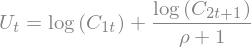

In [3]:
# Define the utiliy function as sympy:

utility_function = sm.ln(C1t)+(1/(1+rho))*sm.ln(C2t1)
print('Utility Function:')
display(sm.Eq(Ut,utility_function))

Budget Constraints 1 & 2 as defined above:


Combine the constraints:


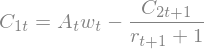

Reformulate:


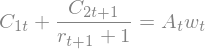

In [4]:
# Define the budget constraints as sympy:

budget_constraint_p1 = sm.Eq(C1t,wt*At-St)
budget_constraint_p2 = sm.Eq(C2t1,(1+rt1)*St)

St_from_bcp2 = sm.solve(budget_constraint_p2,St)
budget_constraint_by_sympy = budget_constraint_p1.subs(St,St_from_bcp2[0])

# Define budget constraint as in the outline:

budget_constraint = sm.Eq(C1t+(C2t1/(1+rt1)),wt*At)

# Showing the results:
print('Budget Constraints 1 & 2 as defined above:')
display(budget_constraint_p1) 
display(budget_constraint_p2) 
print('Combine the constraints:')
display(budget_constraint_by_sympy)
print('Reformulate:')
display(budget_constraint)

optimal Consumption in period 1:


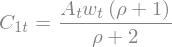

optimal Consumption in period 2:


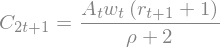

Euler Equation:


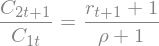

In [5]:
# Optimum value for C1t by inserting budget constraint into the utility function and differentiating:

C2t1_from_con = sm.solve(budget_constraint,C2t1)
objective_subs = utility_function.subs(C2t1,C2t1_from_con[0])
foc1 = sm.diff(objective_subs,C1t)
sol1 = sm.solve(sm.Eq(foc1,0),C1t)
opt_C1t = sm.Eq(C1t,sol1[0])

# Optimum value for C2t1 by inserting budget constraint into the utility function and differentiating:

C1t_from_con = sm.solve(budget_constraint,C1t)
objective_subs = utility_function.subs(C1t,C1t_from_con[0])
foc2 = sm.diff(objective_subs,C2t1)
sol2 = sm.solve(sm.Eq(foc2,0),C2t1)
opt_C2t1 = sm.Eq(C2t1,sol2[0])

# We can then straightforward derive the Euler-equation (C2t1/C1t) by taking together the two latter results. 
# The Euler-equation has the advantage that it shows the relative change in consumption and not the level.

euler = sol2[0]/sol1[0]
euler_equation=sm.Eq(C2t1/C1t,euler)

# Showing the results:
print('optimal Consumption in period 1:')
display(opt_C1t)
print('optimal Consumption in period 2:')
display(opt_C2t1)
print('Euler Equation:')
display(euler_equation)

Saving Equation:


Insert optimal first period consumption:


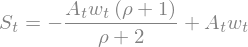

Simplify:


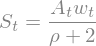

In [6]:
# In order to get total savings, we only have to rearrange the budget constraint from period 1 and insert optimal consumption we just derived:

savings_period1 = sm.solve(budget_constraint_p1,St)
savings_period1_fullequation = sm.Eq(St,savings_period1[0])
savings_formula = savings_period1_fullequation.subs(C1t,sol1[0])
savings_formula_simplified=sm.simplify(savings_formula)

# We print all the steps and the result:
print('Saving Equation:')
display(savings_period1_fullequation)
print('Insert optimal first period consumption:')
display(savings_formula)
print('Simplify:')
display(savings_formula_simplified)

Total savings:


Reformulate:


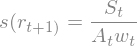

Insert Saving Equation and simplify:


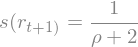

In [7]:
# Having calculated total savings, we can also calculate the saving rate:

total_savings=sm.Eq(St ,s*wt*At)
saving_r = sm.solve(total_savings,s)
saving_r2 = sm.Eq(s ,saving_r[0])
saving_rate_equation = saving_r2.subs(St,sm.simplify(savings_period1[0].subs(C1t,sol1[0])))

print('Total savings:')
display(total_savings)
print('Reformulate:')
display(saving_r2)
print('Insert Saving Equation and simplify:')
display(saving_rate_equation)

Saving Rate: s=


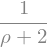

In [8]:
# For later, we define the saving rate 
# as saving_rate_equation shows the whole equation for illustration reasons, but we only need the right-hand term).

saving_rate = 1/(2+rho)
print('Saving Rate: s=')
display(saving_rate)

### **Production**
<p>         <br>
So far we have just introduced the households. We consider the case where firms have a standart neoclssical Cobb-Douglas production function:

\begin{eqnarray*}
Y_t=F(K_t,A_tL_t)=(K_t)^\alpha(A_tL_t)^{1-\alpha}
\end{eqnarray*}

where total factor productivity as well as population grow with a certain rate:
    
\begin{eqnarray*}
A_t=(1+g)A_{t-1}
\end{eqnarray*}

\begin{eqnarray*}
L_t=(1+n)L_{t-1}
\end{eqnarray*}

- $K_t$ = capital stock in period t
- $A_t$ = total factor productivity in t
- $L_t$ = amount of labour in t
- $\alpha$ = capital share in production
- $g$ = growth rate of total factor productivity
- $n$ = growth rate of population
    
As we use the terms of effectice labor, it is however much easier to exert the intensive form of production. Hence we define:

\begin{eqnarray*}
\frac{1}{A_tL_t}F(K_t,A_tL_t)=F(\frac{K_t}{A_tL_t},1)
\end{eqnarray*}   
    
and in this particular case
    
\begin{eqnarray*}
y=f(k_t)=k_t^\alpha
\end{eqnarray*}  
 
with    
    
\begin{eqnarray*}
k_t=\frac{K_t}{A_tL_t}, y_t=\frac{Y_t}{A_tL_t}, f(k_t)=F(k_t,1)
\end{eqnarray*}      
    
We further assume that factor markets are perfektly competitive, i.e.:
    
\begin{eqnarray*}
r_t=f'(k_t)
\end{eqnarray*}
    
\begin{eqnarray*}  
w_t=f(k_t)-f'(k_t)k_t 
\end{eqnarray*}
<p>         <br>

In [9]:
# We define the missing corresponding sympy variables:

yt = sm.symbols('y_t')
kt = sm.symbols('k_t')
rt = sm.symbols('r_t') 

In [10]:
# Define the production function:

f = kt**alpha
print('Production Function:')
display(sm.Eq(yt,f))

Production Function:


In [11]:
# Calculate the real interest rate:

real_interest_rate = sm.diff(f,kt)
real_interest_rate = sm.simplify(real_interest_rate)
print('Real Interest Rate:')
display(sm.Eq(rt,real_interest_rate))

Real Interest Rate:


In [12]:
# Calculate the wage rate per unit of effective labor:

wage_rate = f-sm.diff(f,kt)*kt
wage_rate = sm.simplify(wage_rate)
print('Wage Rate per Unit of Effective Labor:')
display(sm.Eq(wt,wage_rate))

Wage Rate per Unit of Effective Labor:


### **Balanced growth path & steady state**
<p>         <br>
We are now able to set up the transition to the balanced growth path:
    
\begin{eqnarray*}
K_{t+1}=s(r_{t+1})w_tA_tL_t
\end{eqnarray*}
    
and therefore    
    
\begin{eqnarray*}
k_{t+1}=s(r_{t+1})w_t\frac{A_tL_t}{A_{t+1}L_{t+1}}=s(r_{t+1})w_t\frac{A_tL_t}{A_t(1+g)L_t(1+n)}=s(r_{t+1})w_t\frac{1}{(1+g)(1+n)}
\end{eqnarray*}
<p>         <br>

In [13]:
# Define again the necessary sympy variables:

kt1 = sm.symbols('k_t+1')

g = sm.symbols('g')
n = sm.symbols('n')

Transition Equation:


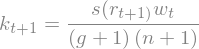

In [14]:
# We also define the transition function as sympy:

transition_int = sm.Eq(kt1,s*wt*(1/((1+g)*(1+n))))
print('Transition Equation:')
display(transition_int)

Transition Equation with Saving and Wage rates plugged-in:


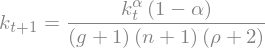

In [15]:
# And we can plug in the saving rate s as well as the wage rate wt:

transition_int2 = transition_int.subs(s,saving_rate)
transition_int2 = transition_int2.subs(wt,wage_rate)
print('Transition Equation with Saving and Wage rates plugged-in:')
display(transition_int2)

In SS k is constant:


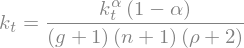

In [16]:
# We then simply replace k_t+1 with k_t:

ss = transition_int2.subs(kt1,kt)
print('In SS k is constant:')
display(ss)

Steady-State k:


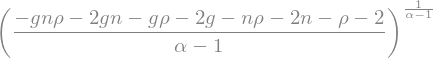

In [17]:
# And are the able to calculate the steady state. The numerator looks complicated is however only the product of (1+g)(1+n)(2+p):

kss = sm.solve(ss,kt)[0]
print('Steady-State k:')
display(kss)

### **Steady-state calculation**

In this part we will now set up functions in order to calculate the steady-state.

In [18]:
# It is then straightforward to set up a steady-sate function:

ss_func = sm.lambdify((alpha,g,n,rho),kss)

# we define a function with which we can calcluate the steady state with flexible parameteres:
def ss_calc(alpha,g,n,rho):
    result = ss_func(alpha,g,n,rho)
    print(f'The steady state solved by the standard python function is: {result}')

In [19]:
# with this widget one can choose the parameter and it yields the steady state capital stock
widgets.interact(
        ss_calc, 
        alpha = widgets.FloatSlider(description="$\\alpha$", min=0.01, max=0.99, step=0.01, continuous_update=False,),
        rho = widgets.FloatSlider(description="$\\rho$", min=0, max=0.99, step=0.01, continuous_update=False,),
        g = widgets.FloatSlider(description="g", min=-0.99, max=0.99, step=0.01, continuous_update=False,),
        n = widgets.FloatSlider(description="n", min=-0.99, max=0.99, step=0.01, continuous_update=False,),      
)

interactive(children=(FloatSlider(value=0.01, continuous_update=False, description='$\\alpha$', max=0.99, min=…

<function __main__.ss_calc(alpha, g, n, rho)>

In [20]:
# we call the steady-state function with certain values as input as comparison:
# we choose parameters, which we think are reasonable today

result = ss_func(1/3,0.03,0.02,0.05)
print(f'The steady state solved by a standart python function is: {result}')

The steady state solved by a standart python function is: 0.17221708150191095


In [21]:
# We can now solve this the problem numerically with optimize.root_scalar. 
# However we have to make sure that we do not overwrite the already defined variables:

alpha_2 = 1/3
g_2 = 0.03
n_2 = 0.02
rho_2 =0.05

obj_kss = lambda kss: kss - ((kss**alpha_2*(1-alpha_2))/((1+g_2)*(1+n_2)*(2+rho_2)))

result2 = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
print(f'The steady state solved numerically with optimize.root_scalar is: {result2.root}')
print(f'Details are as followed:')
result2

The steady state solved numerically with optimize.root_scalar is: 0.1722170815014273
Details are as followed:


      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.1722170815014273

In [22]:
# We test if the two solutions are the same:

np.allclose(result, result2.root)

True

### **Steady-state illustration**

We now set up a plot, where the balanced growth path as well as the steady-state are shown. With several sliders one then can choose values for the different variabels and parameters.

In [23]:
# We have to define first an equation corresponding to transition_int2 i.e. the corresponding path:

def kt1_func(kt, alpha, rho, n, g):                                
    return ((1-alpha)*kt**alpha)/((2+rho)*(1+n)*(1+g))

kt = np.linspace(0,1,500) 

In [24]:
# And the plot function:

def plot_OLG(alpha,rho,g,n):
    plt.figure(dpi=150)
    plt.plot(kt,kt1_func(kt, alpha, rho, n, g), color = 'green')
    plt.plot(range(10),range(10), color = 'blue')
    plt.plot(ss_func(alpha,g,n,rho),ss_func(alpha,g,n,rho), marker='*',color='red')
    plt.title('OLG model: Basic version')  
    plt.xlabel('$ k_t $')
    plt.ylabel( '$ k_ {t + 1} $')
    plt.xlim([0,1])
    plt.ylim([0,1]) 
    plt.legend(('BGP', '45\N{DEGREE SIGN}-line', 'steady state'), loc='upper left')
    plt.grid()
    sol = np.round(ss_func(alpha,g,n,rho),3)
    text = 'Steady state at: ' + str(sol)
    plt.text(0.64,0.95,text, fontsize='small', c='red', bbox=dict(facecolor='none', edgecolor='red'))
    text = 'Here you can choose all variables and parameters of the basic OLG model!'
    plt.text(0, 1.1, text, fontsize='x-small', c='black')
    

# Plotting plots, with interactive slider
widgets.interact(
        plot_OLG, 
        alpha = widgets.FloatSlider(description="$\\alpha$", min=0.01, max=0.99, step=0.01, value=alpha_2, continuous_update=False,),
        rho = widgets.FloatSlider(description="$\\rho$", min=-0.99, max=0.99, step=0.01, value=rho_2, continuous_update=False,),
        g = widgets.FloatSlider(description="g", min=-0.99, max=0.99, step=0.01, value=g_2, continuous_update=False,),
        n = widgets.FloatSlider(description="n", min=-0.99, max=0.99, step=0.01, value=n_2, continuous_update=False,),      
)

interactive(children=(FloatSlider(value=0.3333333333333333, continuous_update=False, description='$\\alpha$', …

<function __main__.plot_OLG(alpha, rho, g, n)>

### Comparison of the steeady state depending on the parameters

In the steady state the capital per unit of effective labor is constant and depends only on four parameters. In the this section, we compare some output variables like the consumption, utility and output depending on these input parameters. 

In [25]:
def parameter_comparison(alpha, rho, n, g, alpha2, rho2, n2, g2):
    # steady-state k
    result = ss_func(alpha, rho, n, g)
    result2 = ss_func(alpha2, rho2, n2, g2)
    
    fig, axs = plt.subplots(4, 2, figsize=(15,15))
    fig.suptitle('Steady State Comparison Depending on Different Parameters', fontsize=20)
    
    # Technology
    At = A*(1+g)**t
    At2 = A*(1+g2)**t
    axs[0, 0].plot(t, At, c='blue')
    axs[0, 0].plot(t, At2, c='green')
    axs[0, 0].set_title('Technology A')
    axs[0, 0].grid()    
    axs[0, 0].legend(('Parameters 1', 'Parameters 2'), loc='upper left')
    
    # Labor
    Lt = L*(1+n)**t
    Lt2 = L*(1+n2)**t    
    axs[0, 1].plot(t, Lt, c='blue')
    axs[0, 1].plot(t, Lt2, c='green')
    axs[0, 1].set_title('Labor L')
    axs[0, 1].grid()    
    axs[0, 1].legend(('Parameters 1', 'Parameters 2'), loc='upper left')
    
    # wage as defined above 
    w = np.empty(t.size)
    w2 = np.empty(t.size)
    for i in range(t.size):
        w[i] = result**alpha *(1-alpha)
        w2[i] = result2**alpha2 *(1-alpha2)
        
    axs[1, 0].plot(t, w, c='blue')
    axs[1, 0].plot(t, w2, c='green')
    axs[1, 0].set_title('Wage Rate per Unit of Effective Labor')
    axs[1, 0].grid()    
    axs[1, 0].legend(('Parameters 1', 'Parameters 2'), loc='center left')
    
    # real interest rate as defined above
    r = np.empty(t.size)
    r2 = np.empty(t.size)
    for i in range(t.size):
        r[i] = result**(alpha-1) *(alpha)
        r2[i] = result2**(alpha2-1) *(alpha2)
        
    axs[1, 1].plot(t, r, c='blue')
    axs[1, 1].plot(t, r2, c='green')    
    axs[1, 1].set_title('Real Interest Rate')
    axs[1, 1].grid()
    axs[1, 1].legend(('Parameters 1', 'Parameters 2'), loc='center left')
    
    # consumption period 1 as defined above
    C_t1 = A*(1+g)**t*w*(rho+1)/(rho+2)
    C2_t1 = A*(1+g2)**t*w2*(rho2+1)/(rho2+2)
    
    axs[2, 0].plot(t, C_t1, c='blue')
    axs[2, 0].plot(t, C2_t1, c='green') 
    axs[2, 0].set_title('HH Consumption in Period 1')
    axs[2, 0].grid()
    axs[2, 0].legend(('Parameters 1', 'Parameters 2'), loc='upper left')
    
    # consumption period 2 as defined above
    C_t2 = A*(1+g)**t*w*(1+r)/(rho+2)
    C2_t2 = A*(1+g2)**t*w2*(1+r2)/(rho2+2)
    
    axs[2, 1].plot(t, C_t2, c='blue')
    axs[2, 1].plot(t, C2_t2, c='green') 
    axs[2, 1].set_title('HH Consumption in Period 2')
    axs[2, 1].grid()
    axs[2, 1].legend(('Parameters 1', 'Parameters 2'), loc='upper left')
    
    # utility 
    U = np.log(C_t1) + np.log(C_t2)/(rho+1)
    U2 = np.log(C2_t1) + np.log(C2_t2)/(rho2+1)
    axs[3, 0].plot(t, U, c='blue')
    axs[3, 0].plot(t, U2, c='green') 
    axs[3, 0].set_title('Lifetime Utility of a HH')
    axs[3, 0].grid()
    axs[3, 0].legend(('Parameters 1', 'Parameters 2'), loc='upper left')
    
    # production
    Y = result**alpha*(A*(1+g)**t *(L*(1+n)**t))
    Y2 = result2**alpha2*(A*(1+g2)**t *(L*(1+n2)**t))
    axs[3, 1].plot(t, Y, c='blue')
    axs[3, 1].plot(t, Y2, c='green') 
    axs[3, 1].set_title('Production of the Whole Economy Y')
    axs[3, 1].grid()
    axs[3, 1].legend(('Parameters 1', 'Parameters 2'), loc='upper left')
    
    fig.text(0.5, 0.10, 'Time', ha='center', va='center',  fontsize=16)
    fig.text(0.08, 0.5, 'Variable of Interest', ha='center', va='center', rotation='vertical',  fontsize=16)


In [26]:
A = 1
L = 1
t = np.linspace(0,100,100)
widgets.interact(
        parameter_comparison, 
        alpha = widgets.FloatSlider(description="$\\alpha_1$", min=0.01, max=0.99, step=0.01, value=alpha_2, continuous_update=False,),
        rho = widgets.FloatSlider(description="$\\rho_1$", min=-0.99, max=0.99, step=0.01, value= rho_2, continuous_update=False,),
        g = widgets.FloatSlider(description="$g_1$", min=-0.99, max=0.99, step=0.01, continuous_update=False,),
        n = widgets.FloatSlider(description="$n_1$", min=-0.99, max=0.99, step=0.01, continuous_update=False,),
        alpha2 = widgets.FloatSlider(description="$\\alpha_2$", min=0.01, max=0.99, step=0.01, value=alpha_2, continuous_update=False,),
        rho2 = widgets.FloatSlider(description="$\\rho_2$", min=-0.99, max=0.99, step=0.01, value=rho_2, continuous_update=False,),
        g2 = widgets.FloatSlider(description="$g_2$", min=-0.99, max=0.99, step=0.01, value=g_2, continuous_update=False,),
        n2 = widgets.FloatSlider(description="$n_2$", min=-0.99, max=0.99, step=0.01, value=n_2, continuous_update=False,),
)

interactive(children=(FloatSlider(value=0.3333333333333333, continuous_update=False, description='$\\alpha_1$'…

<function __main__.parameter_comparison(alpha, rho, n, g, alpha2, rho2, n2, g2)>

The figure shows that:
- in the steady state the wage per unit of effective labor is constant, this statement is true for all variables measured in effective labor units
- the real interest rate is constant, because it depends on the steady state capital stock per unit of effective labor, which is constant
- the houshold consumption and lifetime utility depends crucially on the technology growth, g
- the whole production of the economy grows with g and n

## **OLG with a government**
<p>         <br>
The basic OLG from the first part is not that realistic. What is missing for example is goverment spending, which of course has to be financed somehow. The two basic means to finance government spending is either through taxes or otherwise by issuing debt-bonds. Both of them reduce the available income of some generations, and it is therefore interesting to study what effect such an implementation of a goverment has for the balanced-growth-path as well as the steady-state. As before, we do not change the setting of log-utility and Cobb-Douglas productivity. Furthermore, goverment spending G_t is also measured as spending per unit of effective labor (as well as taxes and bonds). What is obvious is that the government spending must be balanced, i.e.
    
\begin{eqnarray*}
G_t=T_t\\ G_t=b_t  
\end{eqnarray*}    

We first consider a labor tax, i.e.
    
\begin{eqnarray*}
C_{1t}=A_t(w_t-T_t)-S_t
\end{eqnarray*}
    
Savings are then:
    
\begin{eqnarray*}
S_t=\frac{1}{2+\rho}A_t(w_t-T_t)
\end{eqnarray*}   
    
Ant the balanced growth path becomes:

\begin{eqnarray*}    
k_{t+1}=\frac{(1-\alpha)k_t^\alpha-T_t}{(1+g)(1+n)(2+\rho)}   
\end{eqnarray*}    
    
With debt issuing, it is much more straightforward, as individuals buy government bonds instead of saving and the balanced growth path becomes therefore:
    
\begin{eqnarray*}    
k_{t+1}=\frac{(1-\alpha)k_t^\alpha}{(1+g)(1+n)(2+\rho)}-b_{t+1}  
\end{eqnarray*}    
    
Let's analyse the effect with a nice plot:

In [27]:
# We redefine the corresponding path steady-state functions:

kt = sm.symbols('k_t')
kt1 = sm.symbols('k_t+1')
alpha = sm.symbols('alpha')
T = sm.symbols('T_t')
bt1 = sm.symbols('b_t+1')    
g = sm.symbols('g')
n = sm.symbols('n')
rho = sm.symbols('rho')

tax_transition = sm.Eq(kt1,((1-alpha)*kt**alpha-T)/((1+g)*(1+n)*(2+rho)))
bond_transition = sm.Eq(kt1,(((1-alpha)*kt**alpha)/((1+g)*(1+n)*(2+rho)))-bt1)

ss_tax = tax_transition.subs(kt1,kt)
# kss = sm.solve(ss_tax,kt)[0]          # Try this command; we are not able to calculate the kss-formula as before!!!

                                        # This means that we are not able to plot stars for the new steady states, which is no that bad as
                                        # steady states are obvious when plotting a 45°-line.

In [28]:
# We also redefine the corresponding path equations:

def kt1_no_gov_func(kt, alpha, rho, n, g):                                
    return ((1-alpha)*kt**alpha)/((2+rho)*(1+n)*(1+g))

def kt1_with_tax_func(kt, alpha, rho, n, g, G):            # With G as variable instead of T_t                    
    return ((1-alpha)*kt**alpha-G)/((2+rho)*(1+n)*(1+g))

def kt1_with_bonds_func(kt, alpha, rho, n, g, G):          # With G as variable instead of b_t+1                   
    return ((1-alpha)*kt**alpha)/((2+rho)*(1+n)*(1+g))-G

kt = np.linspace(0,1,500) 

In [29]:
# And again the plot function:

def plot_OLG_with_G(alpha,rho,g,n,G):
    plt.figure(dpi=150)
    plt.plot(kt,kt1_no_gov_func(kt, alpha, rho, n, g))
    plt.plot(kt,kt1_with_tax_func(kt, alpha, rho, n, g, G))
    plt.plot(kt,kt1_with_bonds_func(kt, alpha, rho, n, g, G))
    plt.plot(range(10),range(10),color='black')
    plt.title('OLG model with government G = ' + str(G))  
    plt.xlabel('$ k_t $')
    plt.ylabel('$ k_ {t + 1} $')
    plt.xlim([0,1])
    plt.ylim([0,1]) 
    plt.legend(('G=0','Tax','Bonds','45\N{DEGREE SIGN}-line'), loc='upper left')
    plt.grid()
    text = 'Here you can also choose the size of government!'
    plt.text(0, 1.1, text, fontsize='x-small', c='black')

In [30]:
widgets.interact(
        plot_OLG_with_G, 
        G = widgets.FloatSlider(description="G_size", min=0, max=0.25, step=0.01, value=0.1, continuous_update=False),
        alpha = widgets.FloatSlider(description="$\\alpha$", min=0.01, max=0.99, step=0.01, value=alpha_2, continuous_update=False,),
        rho = widgets.FloatSlider(description="$\\rho$", min=-0.99, max=0.99, step=0.01, value=rho_2, continuous_update=False,),
        g = widgets.FloatSlider(description="g", min=-0.99, max=0.99, step=0.01, value=g_2, continuous_update=False,),
        n = widgets.FloatSlider(description="n", min=-0.99, max=0.99, step=0.01, value=n_2, continuous_update=False,),        
)

interactive(children=(FloatSlider(value=0.3333333333333333, continuous_update=False, description='$\\alpha$', …

<function __main__.plot_OLG_with_G(alpha, rho, g, n, G)>

As a result, we see that goverment spending i.e. its financing reduces the steady-state capital stock, however the effect of taxes is smaller than the effect of debt-issuing. 

In [31]:
# As above we can now solve this the problem numerically with optimize.root_scalar. 

alpha = 1/3
g = 0.03
n = 0.02
rho =0.05

# As can be seen in the figure, the government spending can not be really big otherwise the model does not converge to a steady state.
G= 0.04

obj_kss_ = lambda kss: kss - ((1-alpha)*kss**alpha)/((2+rho)*(1+n)*(1+g))

obj_kss_tax = lambda kss: kss - ((1-alpha)*kss**alpha-G)/((2+rho)*(1+n)*(1+g))  # With G as variable instead of T_t   

obj_kss_bond = lambda kss: kss - (((1-alpha)*kss**alpha)/((2+rho)*(1+n)*(1+g))-G)  # With G as variable instead of b_t+1   

result_ = optimize.root_scalar(obj_kss_,bracket=[0.1,100],method='brentq')
result_t = optimize.root_scalar(obj_kss_tax,bracket=[0.1,100],method='brentq')
result_b = optimize.root_scalar(obj_kss_bond,bracket=[0.1,100],method='brentq')

print(f'The steady state solved numerically with optimize.root_scalar is without government: {result_.root}')

print(f'The steady state solved numerically with optimize.root_scalar is with taxes: {result_t.root}')

print(f'The steady state solved numerically with optimize.root_scalar is with bonds: {result_b.root}')


The steady state solved numerically with optimize.root_scalar is without government: 0.1722170815014273
The steady state solved numerically with optimize.root_scalar is with taxes: 0.1434754466865211
The steady state solved numerically with optimize.root_scalar is with bonds: 0.106913475354846


## Conclusion

In our model project we analyzed a standard overlapping generations model. First, we solved the household optimization using sympy. Similarly, we solved the production side. Combining these two optimal behaviors, we are able to calculate the steady state. We then visualize the steady state and the evolution of the key variables in this steady state. Moreover, we make this visualization interactive, so we can directly observe the effect of the model parameter. In the last step, we introduce a government and analyze the steady state in this case. Unfortunately, we are unable to calculate a closed form solution for the steady state. But we can show that the effect of taxes is smaller than the effect of bonds.
